In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow as tf
from scikitplot.metrics import plot_confusion_matrix#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
df1=pd.read_csv('Muestras/PruebaAgena.csv')

cambios=df1[df1['Tiempo']=='Order'].index.tolist()

contador = 0
x= []
y=[]
for i in cambios:
    gesto1=df1[(df1.index>=i-300)&(df1.index<i)].astype(int)
    gesto1 = gesto1.to_numpy()

#     m=np.fft.rfft(gesto1[:,2:8],axis=0)
#     f=30
#     ones=np.ones(f)
#     zeros=np.zeros(m.shape[0]-f)
#     c=np.concatenate((ones,zeros))
#     clean=m*c.reshape(m.shape[0],1)
#     m=np.fft.irfft(clean,axis=0)
#     x.append(m)

    x.append(gesto1[:,2:8])

y=[1,1,1,1,1,3,3,3,3,3,2,2,2,2,2,0,0,0,0,0,1,1,1,1,1,3,3,3,3,3,2,2,2,2,2,0,0,0,0,0,1,1,1,1,1,3,3,3,3,3,2,2,2,2,2,0,0,0,0,0]
yd = [1,1,1,1,1,3,3,3,3,3,2,2,2,2,2,0,0,0,0,0]
x = np.array(x)
y = np.array(y)
x = (x+32762)/65536
print(x.shape)

(60, 300, 6)


In [ ]:
#se convierte el archivo csv de las muestras para crear el conjunto de muestras de test
#y es el orden de las muestras en el archivo csv

In [23]:
allModels = []
bestModels = []
contador = 0
modelosG = [1,4,8,11,12,13,14,15,16,17,18,19,20,21,22,23]
modelosE = [11,12,13,15,19,21]
for i in [10,100]:
    for j in [10,50,100]:
        for k in [5,10,20,30]:
            if contador in modelosE:
                modelo = tf.keras.models.load_model('./modelos/modelo_bs'+str(i)+'_sf'+str(j)+'_nf'+str(k)+'.h5')
                bestModels.append(modelo)
            if contador in modelosG:
                modelo = tf.keras.models.load_model('./modelos/modelo_bs'+str(i)+'_sf'+str(j)+'_nf'+str(k)+'.h5')
                allModels.append(modelo)
            
            contador+=1

In [ ]:
# se cargan los modelos cullas curvas de aprendisaje se vieran buenas (modelosG) estos modelos mostraron indecicionn en
# una muestra especifica, se decidio solo tomar los modelos que no respondieron bien a esa muestra y se crea el grupo modelosE

In [25]:
allPredicts = []
bestPredicts = []
for i in bestModels:
    preds = i.predict(x).argmax(axis=1)
    bestPredicts.append(preds)
for i in allModels:
    preds = i.predict(x).argmax(axis=1)
    allPredicts.append(preds)   
    
allPredicts = np.array(allPredicts)
bestPredicts = np.array(bestPredicts)

finalPreds = stats.mode(bestPredicts,axis=0)

In [26]:
allPredicts[:,28]

array([0, 0, 0, 3, 3, 3, 1, 3, 2, 0, 0, 3, 1, 3, 0, 1], dtype=int64)

In [ ]:
#aqui se puede ver que todos los modelos tienen respuestas muy diferentes ante la misma muestra que es un 3(X)
#de aqui se toman los modelos que efectivamente dieron 3 como resultado ([11,12,13,15,19,21])

In [27]:
bestPredicts[:,28]

array([3, 3, 3, 3, 3, 3], dtype=int64)

In [28]:
print(finalPreds[0][0][40:60])
print(finalPreds[1][0][40:60])

[1 1 1 1 1 3 3 3 3 3 2 2 2 2 2 0 0 0 0 1]
[6 6 6 6 6 6 6 6 6 6 6 4 5 6 6 5 5 5 4 5]


In [ ]:
#al final se toma la moda de las predicciones de todos los modelos para el veredicto final

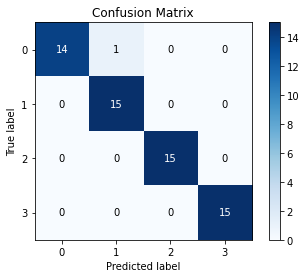

In [29]:
plot_confusion_matrix(y, finalPreds[0][0], normalize=False)

In [ ]:
#otra forma de determinar la prediccion final es con el promedio de las respuestas de cada modelo, ya que las respuestas
#de los modelos son probabilidades 

In [60]:
prediccionesCompletas = []
for i in bestModels:
    preds = i.predict(x)
    prediccionesCompletas.append(preds)
prediccionesCompletas = np.array(prediccionesCompletas)
prediccionesCompletas.shape

(6, 60, 4)

In [ ]:
#se toman las predicciones completas sin tomar el valor maximo, por eso el shape es de 6 predicciones por 60 muestras
#por 4 prtedicciones por modelo

In [61]:
prediccionesPromedio = (np.sum(prediccionesCompletas,axis=0)/6)
prediccionFinal =prediccionesPromedio.argmax(axis=1)

In [ ]:
#sacamos el promedio de cada prediccion y luego sacamos el mayor

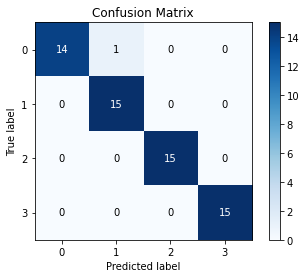

In [62]:
plot_confusion_matrix(y, prediccionFinal, normalize=False)

In [ ]:
#al final obtenemos el mismo resultado